## Kitchen utensils classifiers with TRANSFER LEARNING

In this project, we will utilize **transfer learning** to train a classifier for kitchen utensils (spoon, fork, knife). Transfer learning involves leveraging a pre-existing, well-trained model and adapting it for a specific task, in this case, classifying kitchen utensils.

### What is Transfer Learning?

Transfer learning is a technique where a model trained on a large dataset for a different task is repurposed for a new, related task. Instead of starting from scratch, we take advantage of the knowledge the model has already acquired.

In this project, we use a pre-trained model to extract features from images of kitchen utensils. The early layers of the model serve as feature extractors, capturing patterns and details from the images. We then replace the final layers of the model with a new layer tailored to classify our specific categories (spoon, fork, knife). By doing so, we only need to train the last layer to make accurate predictions for our three categories, which significantly reduces training time and improves performance.


## Dataset Collection

To train the classifier effectively, we will need to collect images for each category: spoon, fork, and knife. These images should be grouped into three separate zip files, one for each category. This organization will help in creating a well-structured dataset for training the model.


In [1]:
#Create folders of spoon, fork and knife
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

## Dataset Organization

You need to place the three zip files for the utensils (spoon, fork, and knife) into each of the folders you just created.


In [15]:
#Entry in each folder and unzip them
%cd cuchillos
!unzip cuchillos.zip
%cd ..
#Delete the zip files
!rm -rf /content/cucharas/cuchillos.zip


%cd tenedores
!unzip tenedores.zip
%cd ..
!rm -rf /content/cuchillos/tenedores.zip


%cd cucharas
!unzip cucharas.zip
%cd ..
!rm -rf /content/tenedores/cucharas.zip

/content/cuchillos
unzip:  cannot find or open cuchillos.zip, cuchillos.zip.zip or cuchillos.zip.ZIP.
/content
/content/tenedores
unzip:  cannot find or open tenedores.zip, tenedores.zip.zip or tenedores.zip.ZIP.
/content
/content/cucharas
Archive:  cucharas.zip
   creating: cucharas/
  inflating: cucharas/00107411229359____1__1200x1200.jpg  
  inflating: cucharas/0034-03.jpg    
  inflating: cucharas/004030-Cuchara-moka-Vianca-Minerva.jpg  
  inflating: cucharas/008010_prod-Cuchara-sopera-Xochitl.jpg  
  inflating: cucharas/0523050_1200.jpg  
  inflating: cucharas/10057484-1.jpg  
  inflating: cucharas/1090553531.jpg  
  inflating: cucharas/183431-1.png   
  inflating: cucharas/2090702-CUCHARA-BIO-ECOLOGICO-BLANCO-PLA.png  
  inflating: cucharas/24f5758db3a07eca1b20bd2d4f9cad7a_800x.jpg  
  inflating: cucharas/30349_G.jpg    
  inflating: cucharas/5d50094568afd7b13b869561bcee613e_792x.jpg  
  inflating: cucharas/61HUQvJaP8L.jpg  
  inflating: cucharas/61iQL5IuMcL.jpg  
  inflating: cu

In [16]:
#Show how many images there are

!ls /content/cucharas/cucharas | wc -l #283
!ls /content/cuchillos/cuchillos | wc -l #183
!ls /content/tenedores/tenedores | wc -l #260

283
183
260


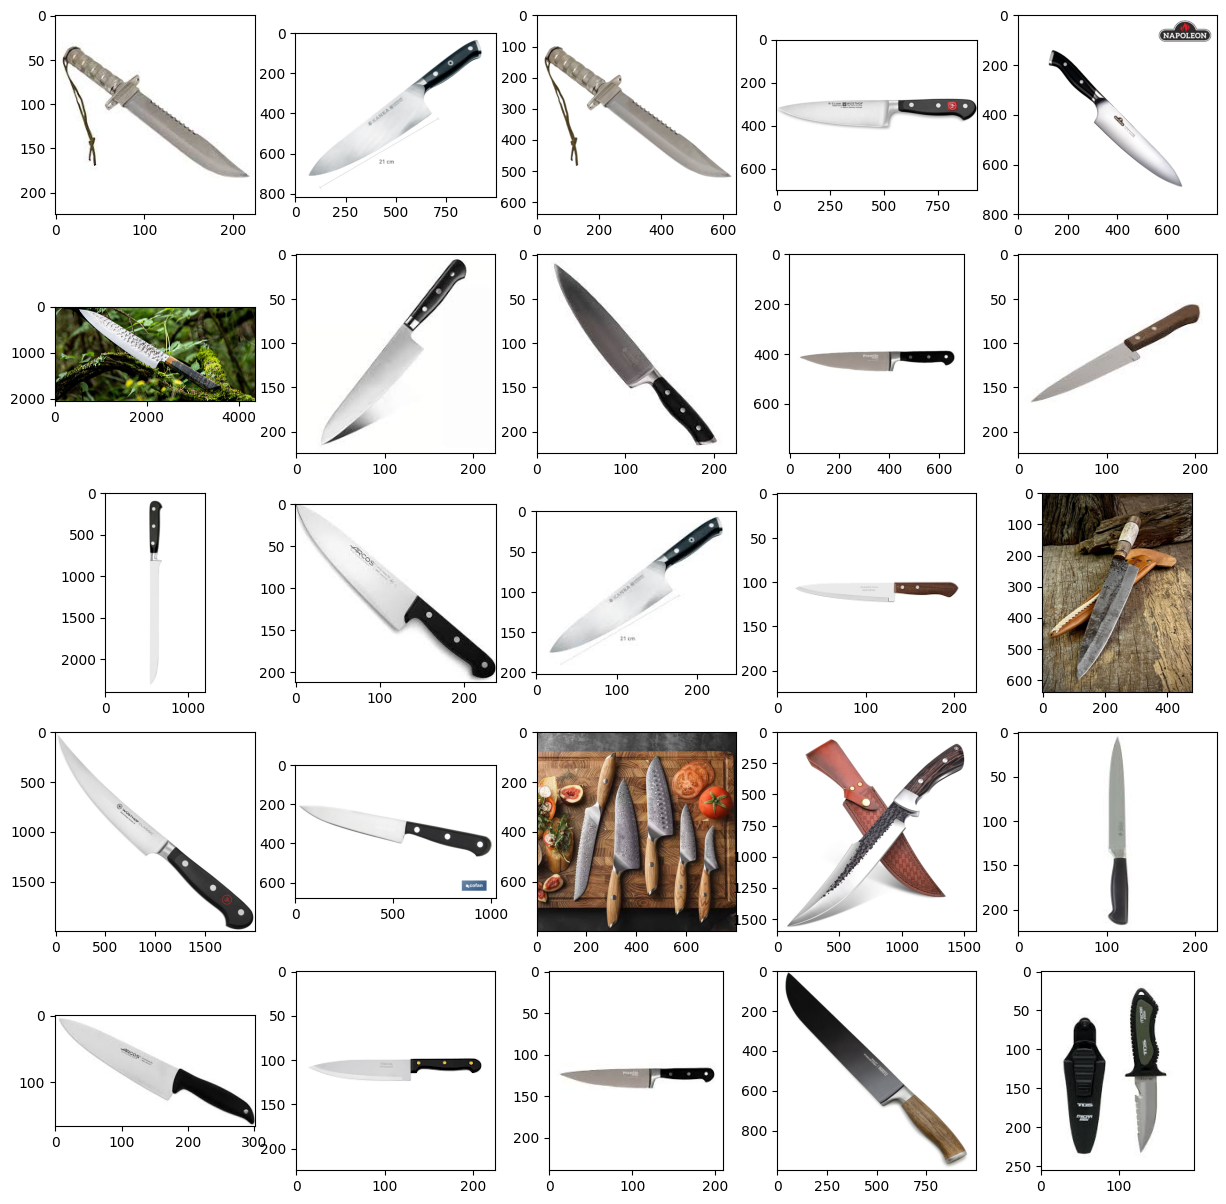

In [17]:
#Print some images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/cuchillos/cuchillos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

## Creating the Dataset

Next, we need to create the actual dataset with three folders for each utensil.

 **Limit the number of images** in each folder to ensure they all have the same number of images. We will use a maximum of 183 images per category, which is the smallest number of images available from the uploaded files.

This ensures that our dataset is balanced and ready for training the model.


In [18]:

!mkdir dataset
!mkdir dataset/cuchillo
!mkdir dataset/tenedor
!mkdir dataset/cuchara

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/cuchillo’: File exists
mkdir: cannot create directory ‘dataset/tenedor’: File exists
mkdir: cannot create directory ‘dataset/cuchara’: File exists


In [19]:


import shutil
carpeta_fuente = '/content/cuchillos/cuchillos'
carpeta_destino = '/content/dataset/cuchillo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 183:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [20]:
carpeta_fuente = '/content/tenedores/tenedores'
carpeta_destino = '/content/dataset/tenedor'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 183:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [21]:
carpeta_fuente = '/content/cucharas/cucharas'
carpeta_destino = '/content/dataset/cuchara'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 183:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [22]:
#Number of images in each folder in the dataset
!ls /content/dataset/cuchara | wc -l
!ls /content/dataset/cuchillo | wc -l
!ls /content/dataset/tenedor | wc -l

183
183
183


## Data Augmentation

This code sets up data augmentation and prepares datasets for training a model.

1. **Define Image File Checker Function**: First,  check if a file is an image based on its file extension. It returns `True` if the file has one of the following extensions: `.png`, `.jpg`, `.jpeg`, `.bmp`, or `.gif`.

2. **Create Data Augmentation Generator**:
   - Uses `ImageDataGenerator` to apply transformations like scaling, rotation, shifting, and zooming to the images, helping to enhance the training dataset.

3. **Setup Training and Validation Generators**:
   - Prepares generators to load images from the directory, apply the specified augmentations, and split the data into training and validation sets.



In [23]:
def is_image_file(filename):
    return filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))

Found 434 images belonging to 3 classes.
Found 106 images belonging to 3 classes.


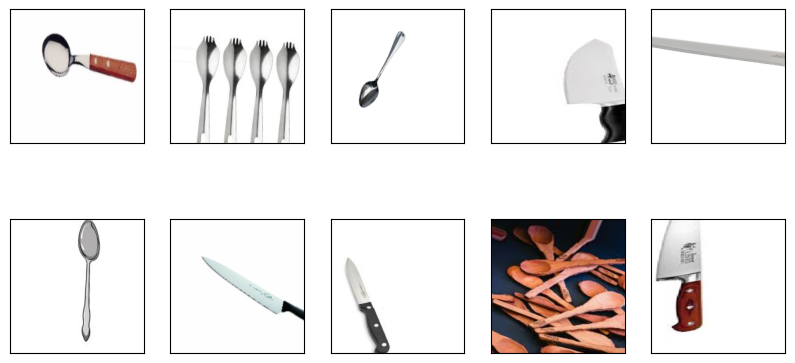

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#DATA AUG
# Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5],
    validation_split=0.2  # 20% para pruebas
)

# Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training',
    classes=[d for d in os.listdir('/content/dataset') if os.path.isdir(d) and is_image_file(d)]
)

data_gen_pruebas = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224),
    batch_size=32,  # Tamaño del lote
    shuffle=True,
    subset='validation',
    classes=[d for d in os.listdir('/content/dataset') if os.path.isdir(d) and is_image_file(d)]
)


# Imprimir 10 imágenes del generador de entrenamiento
plt.figure(figsize=(10, 5))

# Extraer el primer lote de imágenes y etiquetas
imagenes, etiquetas = next(data_gen_entrenamiento)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagenes[i])
plt.show()




## Transfer Learning

We use Transfer Learning with a pre-trained MobileNetV2 model from TensorFlow Hub, adding a final Dense layer with 3 units for our classification task. The MobileNetV2 layer is frozen, and only the final layer is trained.


In [30]:

import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

# URL del modelo preentrenado MobileNetV2 para características
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Crear el modelo
model = tf_keras.Sequential([
    hub.KerasLayer(url, input_shape=(224, 224, 3), trainable=False), #congeelamiento del resto de capas
    tf_keras.layers.Dense(3, activation='softmax')  # Ajustar el número de clases a 3
])


#Compilar como siempre
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Resumen del modelo
model.summary()

#MAS DE DOS MILLONES DE PARAMETROS


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## Train the model
 Trains the model using the training and validation data generators, with the specified number of epochs, batch size, and steps per epoch.


In [32]:
# Ajuste de parámetros
BATCH_SIZE = 32  # Aumenta si tienes suficiente memoria
EPOCAS = 50



steps_per_epoch = data_gen_entrenamiento.samples // BATCH_SIZE
validation_steps = data_gen_pruebas.samples // BATCH_SIZE

historial = model.fit(
    data_gen_entrenamiento,
    epochs=EPOCAS,
    validation_data=data_gen_pruebas,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    batch_size=BATCH_SIZE  # Ajusta el tamaño del lote si es necesario
)


Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.9179

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 38s 3s/step - loss: 0.2560 - accuracy: 0.9179 - val_loss: 0.2015 - val_accuracy: 0.9375
Epoch 2/50
13/13 [==============================] - 27s 2s/step - loss: 0.2528 - accuracy: 0.9055 - val_loss: 0.1687 - val_accuracy: 0.9595
Epoch 3/50
13/13 [==============================] - 31s 2s/step - loss: 0.2670 - accuracy: 0.9005 - val_loss: 0.2469 - val_accuracy: 0.9054
Epoch 4/50
13/13 [==============================] - 31s 2s/step - loss: 0.2586 - accuracy: 0.9030 - val_loss: 0.1502 - val_accuracy: 0.9324
Epoch 5/50
13/13 [==============================] - 27s 2s/step - loss: 0.2379 - accuracy: 0.9129 - val_loss: 0.2139 - val_accuracy: 0.9324
Epoch 6/50
13/13 [==============================] - 27s 2s/step - loss: 0.2170 - accuracy: 0.9135 - val_loss: 0.1533 - val_accuracy: 0.9459
Epoch 7/50
13/13 [==============================] - 31s 3s/step - loss: 0.2018 - accuracy: 0.9204 - val_loss: 0.1729 - val_accuracy: 0.9730
Epoch 8/50
13/13 [=============

**We can see that the model performs quite well, with a very high validation accuracy and a relatively low validation loss. There is not much difference between accuracy and validation accuracy, or between loss and validation loss, indicating that there is no significant overfitting.**


### Predict New Pictures

Finally, we want to predict new photos taken from the internet. For this, we first create the `categorize` function, which receives a URL, downloads the image, and performs transformations (normalization, reshaping, and resizing).


In [35]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)  #recibe url
  img = Image.open(BytesIO(respuesta.content)) #descarga la imagen
  img = np.array(img).astype(float)/255 #y haace las transformaciones a array (normalizacion reshape)

  img = cv2.resize(img, (224,224)) #resize
  prediccion = model.predict(img.reshape(-1, 224, 224, 3))  #reshape
  return np.argmax(prediccion[0], axis=-1)


In [37]:
#0 = cuchara, 1 = cuchillo, 2 = tenedor
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLM40vvV2mxULKKDdqHwh-2SWFqVRt9Q0Kew&s' #debe ser 0
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 1s 1s/step
0


In [38]:
#0 = cuchara, 1 = cuchillo, 2 = tenedor
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSK_inAbpWd8wS-_AMnK8AmEWY-bB7resCFfQ&s' #debe ser 1
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 52ms/step
1
